
Федотов Кирилл 3821Б1ПР1 
Задание 24.
Текст задания постараюсь добавить сегодня.

In [80]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [81]:

#Вынес вперед функции, необходимые для метода МРНК
def func(Lambda, C, x):
    return C[0] + C[1] * x + C[2] * (x ** 2) + C[3] * (np.e ** (Lambda * x))

#Выполним поиск наименьшмх квадратов для линейного матричного уравнения
def get_Lstsq(Lambda, Ytest):
    #Для этого создадим матрицу:
    A =  np.ones((m, 4), dtype=float) 
    A[:, 1] = testX
    A[:, 2] = testX ** 2
    A[:, 3] = np.e ** (Lambda * testX)
    #Применим сам метод наименьших квадратов
    return np.linalg.lstsq(A, Ytest)[0]

# Вычисляем значения функций на двух выборках - таким образом впоследствии вычисляем функцию, которую надо минимизировать
def sol1(Lambda):    
    
    C = get_Lstsq(Lambda, testY1)
    approxymatedY = func(Lambda, C, testX)
    
    return np.sum((approxymatedY - testY1) ** 2)


def sol2(Lambda):  
    
    C = get_Lstsq(Lambda, testY2)
    approxymatedY = func(Lambda, C, testX)
    
    return np.sum((approxymatedY - testY2) ** 2)



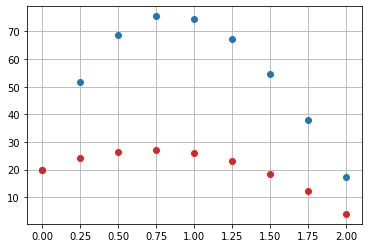

In [82]:
#Введем m - число точек
m = 9

testX = np.arange(0, 2.01, 0.25, dtype = float)

#ВВедем исходные векторы
testY1 = np.array([20.00, 51.58, 68.73, 75.46, 74.36, 67.09, 54.73, 37.98, 17.28])

testY2 = np.array([20.00, 24.13, 26.50, 27.13, 26.00, 23.13, 18.50, 12.13, 4.00])

#Проверим распределение данных на графике
plt.grid()
plt.plot(testX, testY1, 'o')
plt.plot(testX, testY2, 'o',color='tab:red')

C:\Users\111\AppData\Local\Temp\ipykernel_12880\4090551974.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, Ytest)[0]


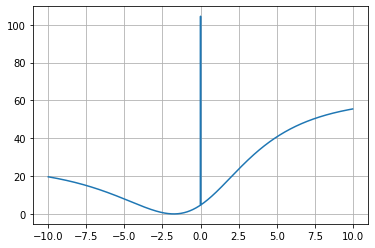

In [83]:
#Отображаем значения минимизируемой функции на графике (первая выборка)
graphX = np.arange(-10.0, 10.0, .01, dtype = float)
graphY = []
for x in graphX:
    graphY.append(sol1(x))
    
plt.grid()
plt.plot(graphX, graphY)

C:\Users\111\AppData\Local\Temp\ipykernel_12880\4090551974.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, Ytest)[0]


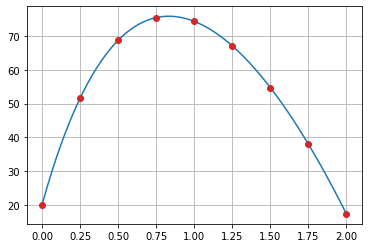

In [84]:
#На данном этапе замечаем,что функция на определенном интервале имеет минимум - найдем его с помощью метода одномерной
#оптимизации

Lambda = minimize_scalar(sol1, bounds=[-10, 10], method='bounded')['x']

validX1 = np.arange(0, 2.01, 0.01, dtype = float)
resultC = get_Lstsq(Lambda, testY1)
validY1 = func(Lambda, resultC, validX1)

#Теперь отобразим первую выборку и ее аппроксимацию
plt.grid()
plt.plot(validX1, validY1)
plt.plot(testX, testY1, 'o',color='tab:red')

C:\Users\111\AppData\Local\Temp\ipykernel_12880\4090551974.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, Ytest)[0]


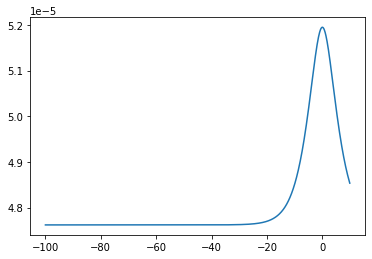

In [85]:
# Проделываем то же самое - отображаем значения минимизируемой функции на графике (вторая выборка)
graphX = np.arange(-100, 10, .1, dtype = float)
graphY = []
for x in graphX:
    graphY.append(sol2(x))
    
plt.plot(graphX, graphY)

C:\Users\111\AppData\Local\Temp\ipykernel_12880\4090551974.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, Ytest)[0]


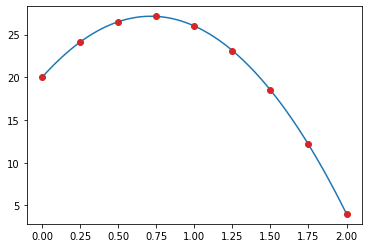

In [86]:
#А вот в данном случае замечаем,что функция бесконечно возрастает на отрезке от -inf до какого-то значения.
#Это значит, что за Lambda можно значение -100(исходя из графика), улучшения аппроксимации всё равно не будет
Lambda = -100

validX2 = np.arange(0, 2.01, 0.01, dtype = float)
resultC = get_Lstsq(Lambda, testY2)
validY2 = func(Lambda, resultC, validX1)

##Теперь отобразим вторую выборку и ее аппроксимацию
plt.plot(validX2, validY2)
plt.plot(testX, testY2, 'o',color='tab:red')

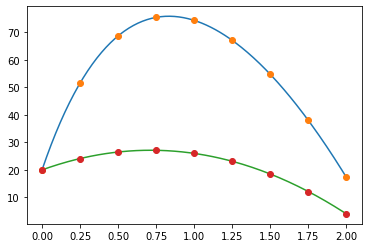

In [87]:
#Для наглядности отобразим обе выборки и обе их аппроксимации на одной плоскости:
plt.plot(validX1, validY1)
plt.plot(testX, testY1, 'o')

plt.plot(validX2, validY2)
plt.plot(testX, testY2, 'o',color='tab:red')

Делаем вывод:

На первой выборке внешняя функция имеет определенный минимум, следовательно у первой функции минимум определяется единственным образом.
На второй выборке внешняя функция возрастает на промежутке от -inf до какого-то значения, а значит определить минимум второй функции невозможно. Однако можно определить его приближение, что и проделано выше.